# Statistics basics
## Final project
Good news! You are hired by some retail company to analyse transaction statistics in a retail chain. (Sorry, this is just an imaginary company so far, but if you successfully finish our program, I'm sure it will become reality.)

You have to use everything that we learned so far to answer questions that are asked by your employer.

Part of the questions require that you write some code that will be automatically tested with autograding. So when you are finished, please, send this work to automatic grading.

The other part of questions are presented in the appropriate quiz. Answer them using your results.

Finally, some problems will be assessed manually. So, please, submit your notebook to staff graded assignment as well.

Note you are not allowed to use loops anywhere in this project!

Let's begin!

### Data

There are three datasets: `customers.csv`, `purchases.csv` and `shops.csv`. They are stored in `data` folder.

`customers.csv` contains information about each customer registered in loyalty program.

`shops.csv` contains information about shops and special offers they organized. One shap can organize several offers and therefore there are usually several rows that correspond to the same shops. However, some shops do not organize special offers at all, but they are presented in this table nevertheless.

`purchases.csv` is a purchase log. It contains information for all customers, either registered in a loyalty program (in this case we know the corresponding customer id) or not registered. One purchase can be a collection of several items, but we see only the total price of everything bought.

In [1]:
#!ls data/

First, let us load these datasets and make a quick glance on them.

### Problem 1 
Load datasets intro variables `customers`, `purchases` and `shops`. Use `pd.read_csv`.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, pearsonr
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
customers = pd.read_csv('https://github.com/mbburova/MDS/raw/main/customers.csv', sep = ',')
purchases = pd.read_csv('https://github.com/mbburova/MDS/raw/main/purchases.csv', sep = ',')
shops = pd.read_csv('https://github.com/mbburova/MDS/raw/main/shops.csv')

### Problem 2 (quiz)

Investigate dataframes and answer the following questions (in the appropriate Quiz):

1. What is the type of variable `customer_id` in the dataset `purchases`?
2. What is the type of variable `age` in the dataset `customers`?

Note that you have to provide your answers based on the meaning of the data, not on the Python object types of the corresponding column.

In [4]:
print("customer_id:", purchases["customer_id"].dtype)
print("age:", customers["age"].dtype)

customer_id: float64
age: float64


### Problem 3 (SGA)
Let us consider column `total_price` in the dataset `purchases`. May we assume that this column is an i.i.d. sample from some random variable? Write your answer and full explanation in the cell below.


In [5]:
purchases

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038
...,...,...,...,...
40397,NaN,2018-05-05,37,169.086474
40398,NaN,2018-09-29,7,310.993395
40399,NaN,2018-10-31,1,17.535630
40400,NaN,2019-02-16,37,218.576020


In [6]:
purchases.shape[0]

40402

Strictly speaking, we cannot know for sure that the column `total_price` is an i.i.d sample of some random variable $X$.
1. Independence considerations. Since we do not know much about the details of how this dataset was collected, we only may assume that the purchases were indeed chosen independently one from another. Some factors that may break the independence condition include purchases made by customers who come from one family with some fixed budget, know each other and agreed to spend specific amount of money on that particular day, belong to some group, like one geographical location.
2. Identical distribution considerations. As with independence considerations, we only may assume that all purchases have the same "background." However, this is not necessarily the case. Customers may have more or less money to spend on a particular day based on their shopping habits. Some might have changed their job and now have either more or less money to spend. Customer's age may also contribute much: younger and older customers may have less money to spend.

The factors listed above may be "balanced out", if we have a rather large number of purchases made by customers coming from different backgrounds -- in this case the law of large numbers and the Central Limit Theorem will produce a close to normal distribution with some trustworthy mean value of total price.

Since, we have a rather larger number of rows (purchases) in our dataset: $40,402$, we will consider that the column `total_price` $\stackrel{\text{i.i.d.}}{\sim} X$.

### Problem 4 (quiz)
Visualise distribution of variable `age` in the dataset `customers` using appropriate visualization tool.


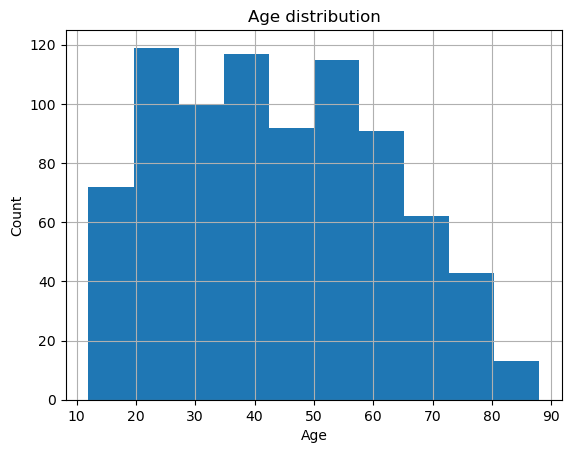

In [7]:
# your code here
customers["age"].hist()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution");

### Problem 5 (quiz)
Your employer is going to provide two special offers for all registered customers based on the customer age. They want to pick some threshold age, and offer one special program to customers who are younger than this threshold age and another special program to customers who are older than this age. They want to choose the threshold in such a way that the number of potential participants of both programs coincide (or at least be as close to each other as possible). What is the threshold?

In [8]:
# your code here
customers["age"].median()

43.0

### Problem 6 (quiz)

Let us visualize how purchases are distributed around a year. For example, it is known that December is a hot month for retail due to Christmas. Will you see it in the data? Are there any other tendencies we will see?

To do it, we have to extract a month from the `date` variable of `purchases` table and create a new variable (new dataframe column) that contains this month, then plot distribution of this variable. There is a special data type in pandas to represent date and time. However, by default `pd.read_csv` does not try to guess that a particular column contains something that looks like a date and reads it just as a column of strings. So let's convert this column manually using function `pd.to_datetime` first:


In [9]:
purchases["date"] = pd.to_datetime(purchases["date"])

Let's check that `date` has correct `dtype`:

In [10]:
purchases["date"].dtype

dtype('<M8[ns]')

This should return something like `dtype('datetime64[ns]')` or `dtype('<M8[ns]')`. It is much easier to work with dates when they are converted to native datetime format instead of strings. For example, you can find the difference between two dates and do a lot of other things. To extract different features of date like month of even day of week, one can use `.dt` accessor (similar to using `.str` accessor to access string methods), see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) for details. For example, this is how we can extract day of week (Monday=0, Sunday=6):

In [11]:
purchases["date"].dt.dayofweek

0        4
1        5
2        6
3        5
4        5
        ..
40397    5
40398    5
40399    2
40400    5
40401    5
Name: date, Length: 40402, dtype: int64

Now let us return to our problem here. We want to make a plot that shows how many purchases we have per month. In other words, we want to create and consider new variable `month`. This is a categorical variable. Use an appropriate tool to visualize it.

Make this bar plot. 

**Hint.** To sort the values on the horizontal axis one can use `.sort_index()`.


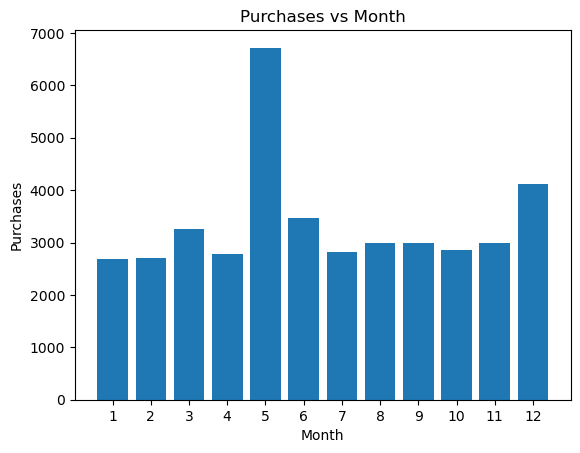

In [12]:
# YOUR CODE HERE
#raise NotImplementedError()
purchases["month"] = purchases["date"].dt.month
plt.bar(purchases["month"].value_counts().index.sort_values(), height=purchases["month"].value_counts().sort_index())
plt.xlabel("Month")
plt.ylabel("Purchases")
plt.title("Purchases vs Month")
plt.xticks(purchases["month"].unique());

### Problem 7 (SGA)

What's wrong with May? Why do we have so many purchases? Are there any unknown holidays in this month? Or it's some other reason? Investigate your data and give an answer. Write it in the cell below. Add new cells to include code / explanations as necessary.

Let's first check the date range for each month

In [13]:
# YOUR CODE HERE
#raise NotImplementedError()
print("All purchases date range from:", purchases["date"].min(), "to:", purchases["date"].max())
pd.concat([purchases.groupby("month").min()["date"], purchases.groupby("month").max()["date"]], keys=["date_begin", "date_end"], axis=1)

All purchases date range from: 2018-05-03 00:00:00 to: 2019-06-03 00:00:00


,date_begin,date_end
month,,
1,2019-01-01,2019-01-31
2,2019-02-01,2019-02-28
3,2019-03-01,2019-03-31
4,2019-04-01,2019-04-30
5,2018-05-03,2019-05-31
6,2018-06-01,2019-06-03
7,2018-07-01,2018-07-31
8,2018-08-01,2018-08-31
9,2018-09-01,2018-09-30


We can clearly see that purchases for May cover both years of 2018 and 2019, while other months cover only either 2018 or 2019. June also covers 2018 and slightly 2019, but not as much as May. Roughly speaking, in our dataset we have two Mays: May-2018 and May-2019.

Let's also look closer at daily purchases in all months in both 2018 and 2019.

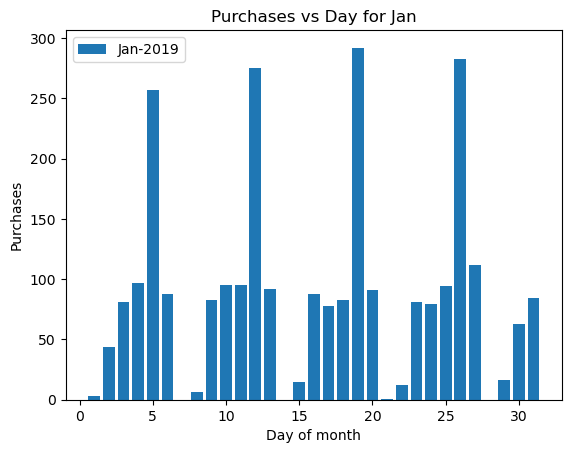

In [14]:
purchases_jan_2019 = purchases.loc[(purchases["month"] == 1) & (purchases["date"].dt.year == 2019)]
plt.bar(purchases_jan_2019["date"].dt.day.value_counts().index.sort_values(), height=purchases_jan_2019["date"].dt.day.value_counts().sort_index(), label="Jan-2019")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Jan")
plt.legend();

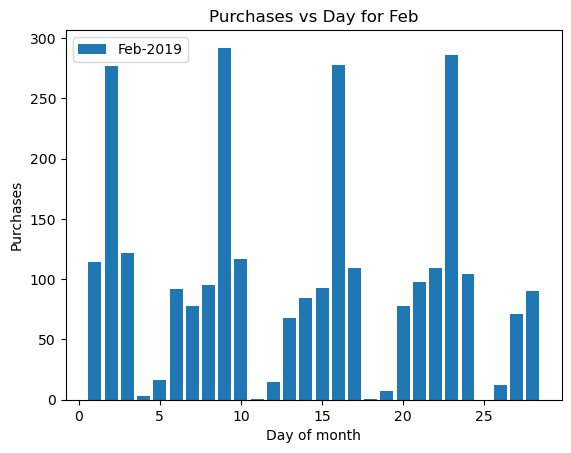

In [15]:
purchases_feb_2019 = purchases.loc[(purchases["month"] == 2) & (purchases["date"].dt.year == 2019)]
plt.bar(purchases_feb_2019["date"].dt.day.value_counts().index.sort_values(), height=purchases_feb_2019["date"].dt.day.value_counts().sort_index(), label="Feb-2019")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Feb")
plt.legend();

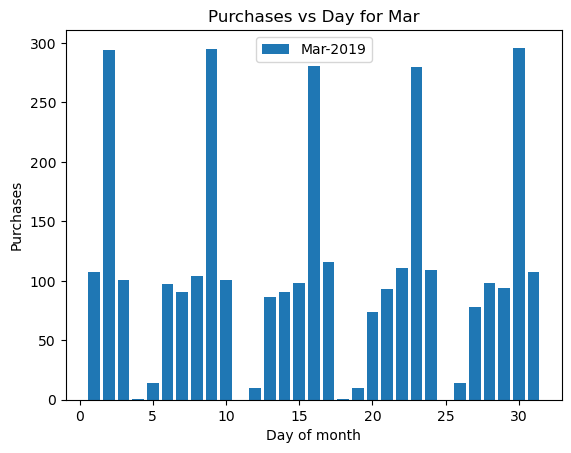

In [16]:
purchases_mar_2019 = purchases.loc[(purchases["month"] == 3) & (purchases["date"].dt.year == 2019)]
plt.bar(purchases_mar_2019["date"].dt.day.value_counts().index.sort_values(), height=purchases_mar_2019["date"].dt.day.value_counts().sort_index(), label="Mar-2019")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Mar")
plt.legend();

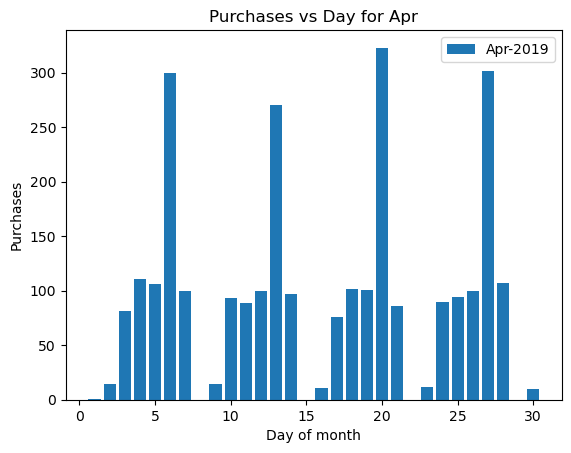

In [17]:
purchases_apr_2019 = purchases.loc[(purchases["month"] == 4) & (purchases["date"].dt.year == 2019)]
plt.bar(purchases_apr_2019["date"].dt.day.value_counts().index.sort_values(), height=purchases_apr_2019["date"].dt.day.value_counts().sort_index(), label="Apr-2019")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Apr")
plt.legend();

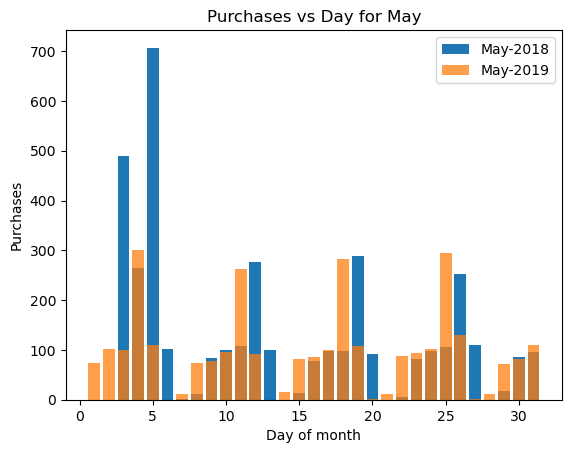

In [18]:
purchases_may_2018 = purchases.loc[(purchases["month"] == 5) & (purchases["date"].dt.year == 2018)]
purchases_may_2019 = purchases.loc[(purchases["month"] == 5) & (purchases["date"].dt.year == 2019)]
plt.bar(purchases_may_2018["date"].dt.day.value_counts().index.sort_values(), height=purchases_may_2018["date"].dt.day.value_counts().sort_index(), label="May-2018")
plt.bar(purchases_may_2019["date"].dt.day.value_counts().index.sort_values(), height=purchases_may_2019["date"].dt.day.value_counts().sort_index(), label="May-2019", alpha=0.75)
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for May")
plt.legend();

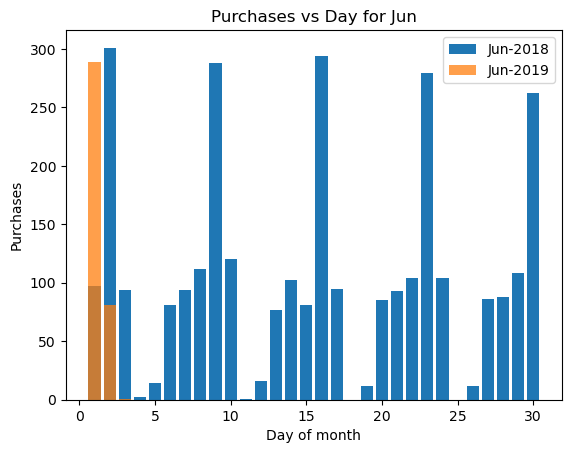

In [19]:
purchases_jun_2018 = purchases.loc[(purchases["month"] == 6) & (purchases["date"].dt.year == 2018)]
purchases_jun_2019 = purchases.loc[(purchases["month"] == 6) & (purchases["date"].dt.year == 2019)]
plt.bar(purchases_jun_2018["date"].dt.day.value_counts().index.sort_values(), height=purchases_jun_2018["date"].dt.day.value_counts().sort_index(), label="Jun-2018")
plt.bar(purchases_jun_2019["date"].dt.day.value_counts().index.sort_values(), height=purchases_jun_2019["date"].dt.day.value_counts().sort_index(), label="Jun-2019", alpha=0.75)
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Jun")
plt.legend();

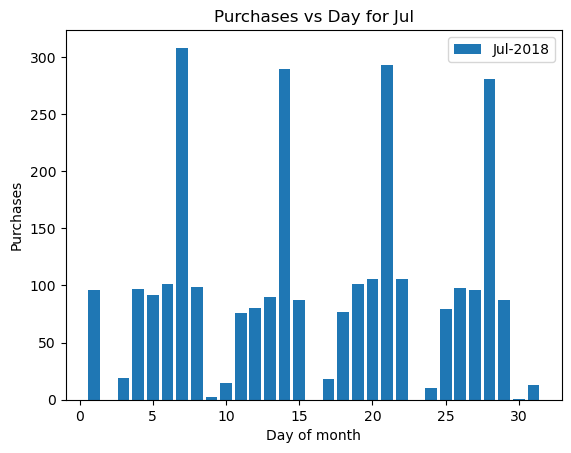

In [20]:
purchases_jul_2018 = purchases.loc[(purchases["month"] == 7) & (purchases["date"].dt.year == 2018)]
plt.bar(purchases_jul_2018["date"].dt.day.value_counts().index.sort_values(), height=purchases_jul_2018["date"].dt.day.value_counts().sort_index(), label="Jul-2018")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Jul")
plt.legend();

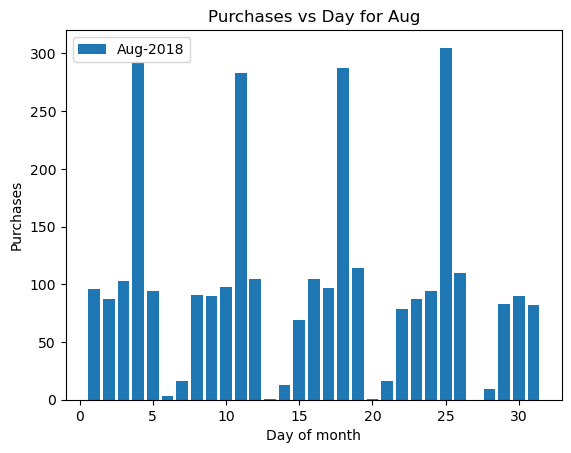

In [21]:
purchases_aug_2018 = purchases.loc[(purchases["month"] == 8) & (purchases["date"].dt.year == 2018)]
plt.bar(purchases_aug_2018["date"].dt.day.value_counts().index.sort_values(), height=purchases_aug_2018["date"].dt.day.value_counts().sort_index(), label="Aug-2018")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Aug")
plt.legend();

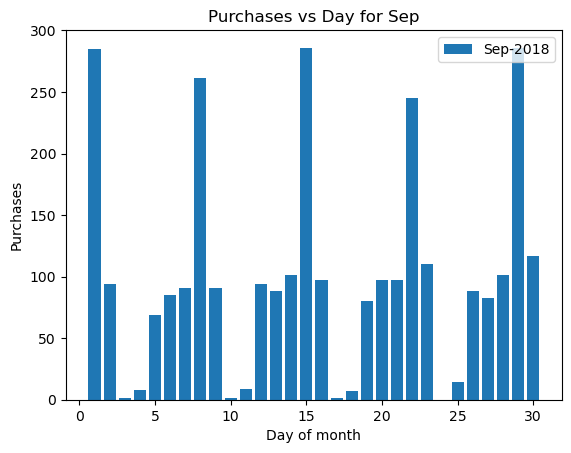

In [22]:
purchases_sep_2018 = purchases.loc[(purchases["month"] == 9) & (purchases["date"].dt.year == 2018)]
plt.bar(purchases_sep_2018["date"].dt.day.value_counts().index.sort_values(), height=purchases_sep_2018["date"].dt.day.value_counts().sort_index(), label="Sep-2018")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Sep")
plt.legend();

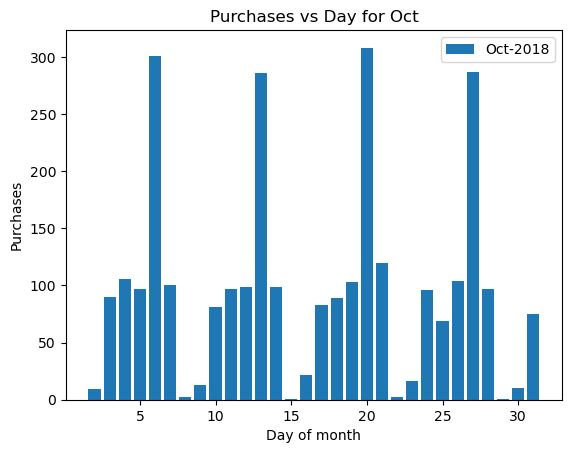

In [23]:
purchases_oct_2018 = purchases.loc[(purchases["month"] == 10) & (purchases["date"].dt.year == 2018)]
plt.bar(purchases_oct_2018["date"].dt.day.value_counts().index.sort_values(), height=purchases_oct_2018["date"].dt.day.value_counts().sort_index(), label="Oct-2018")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Oct")
plt.legend();

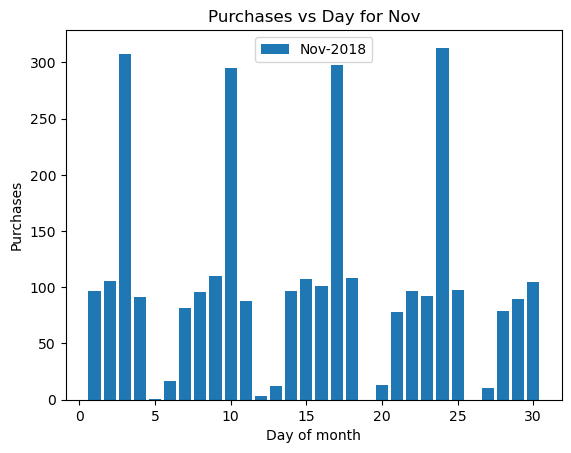

In [24]:
purchases_nov_2018 = purchases.loc[(purchases["month"] == 11) & (purchases["date"].dt.year == 2018)]
plt.bar(purchases_nov_2018["date"].dt.day.value_counts().index.sort_values(), height=purchases_nov_2018["date"].dt.day.value_counts().sort_index(), label="Nov-2018")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Nov")
plt.legend();

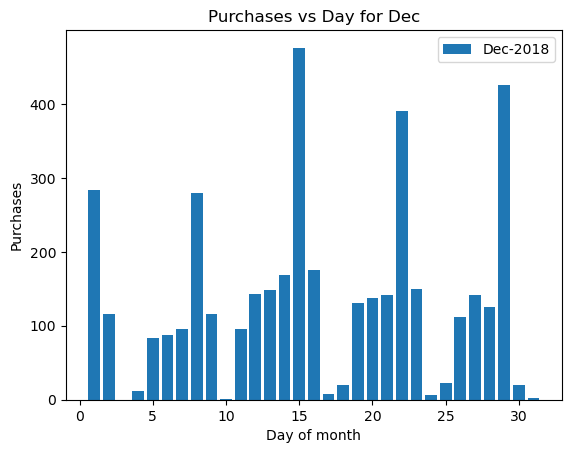

In [25]:
purchases_dec_2018 = purchases.loc[(purchases["month"] == 12) & (purchases["date"].dt.year == 2018)]
plt.bar(purchases_dec_2018["date"].dt.day.value_counts().index.sort_values(), height=purchases_dec_2018["date"].dt.day.value_counts().sort_index(), label="Dec-2018")
plt.xlabel("Day of month")
plt.ylabel("Purchases")
plt.title("Purchases vs Day for Dec")
plt.legend();

We can clearly see that all months have periodic spikes. It is easy to check that these are Saturdays. And visually on average there are around 300 purchases per each Saturday in each month. Purchase patterns for May of 2018 and 2019 look similar. However, in May 2018 there were three days with abnormal number of purchases: May 3 (Thu), May 4 (Fri), and May 5 (Sat) -- even larger than on usual Saturdays.

Maybe a new shop was opened around May 3-5, 2018? Or some specific shop(s) offered great discounts on these days? Let's check if the shop_id column has spikes on these dates.

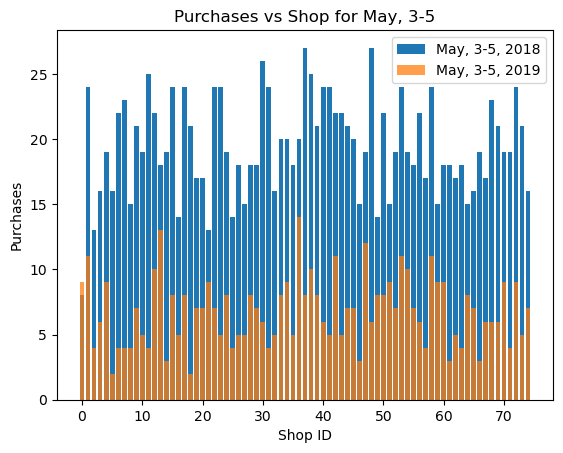

In [26]:
plt.bar(purchases_may_2018.loc[purchases_may_2018["date"].dt.day.isin([3, 4, 5])]["shop_id"].value_counts().index.sort_values(), height=purchases_may_2018.loc[purchases_may_2018["date"].dt.day.isin([3, 4, 5])]["shop_id"].value_counts().sort_index(), label="May, 3-5, 2018")
plt.bar(purchases_may_2019.loc[purchases_may_2019["date"].dt.day.isin([3, 4, 5])]["shop_id"].value_counts().index.sort_values(), height=purchases_may_2019.loc[purchases_may_2019["date"].dt.day.isin([3, 4, 5])]["shop_id"].value_counts().sort_index(), label="May, 3-5, 2019", alpha=0.75)
plt.xlabel("Shop ID")
plt.ylabel("Purchases")
plt.title("Purchases vs Shop for May, 3-5")
plt.legend();

We can clearly see that all shops contributed more or less evenly to larger purchases on "magic" three days in 2018 as compared with the same days in 2019.

In conclusion, there is a much higher number of purchases in May due to the following possible reasons:
- our dataset covers May of 2018 and 2019, while other months are covered only once -- either in 2018 or in 2019,
- there were three unusual days in May of 2018 with a much higher number of purchases, even if compared with Saturday spikes. No specific shop contributed to larger traffic, so there might be some special event / holiday on these three or upcoming days,
- there are errors in the collected dataset.

### Problem 8 (quiz)
We see that people go to shop more often in December. But do they spend more per each visit? Let us draw a bar plot that shows the average purchase total price per month of year. Use `groupby` with the `month` variable you (hopefully) created earlier.

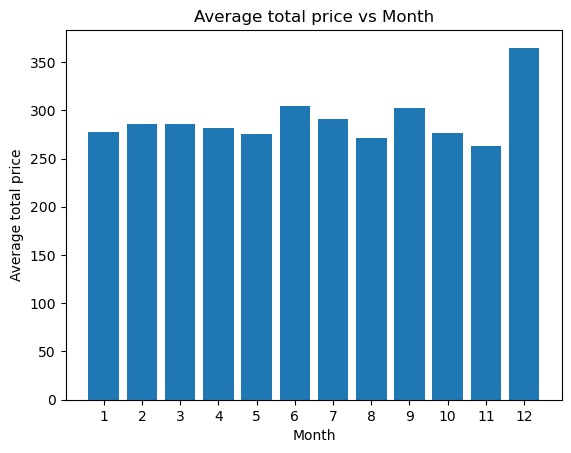

In [27]:
# your code here
plt.bar(purchases.groupby("month")["total_price"].mean().index, height=purchases.groupby("month")["total_price"].mean())
plt.xlabel("Month")
plt.ylabel("Average total price")
plt.title("Average total price vs Month")
plt.xticks(purchases["month"].unique());

### Problem 9 (quiz)
Okay, we see that there is a difference between December's mean purchase price and other month's. But we also see that the average price is different in different months (not including December), probably due to some random factors. Is it possible that December behaviour is just a result of fluke? To answer this question, let us compare two months, for example, December and November, in a statistically rigorous way.

To do so, let us find the average purchase price in each month in each shop (hint: use `.pivot_table`), then extract two samples: one contains average purchase prices in December and another in November. The number of elements in each sample should be equal to the number of shops. Is it true that they are different? Use the statistical test that suits this problem the best with a two-sided alternative. Then answer the question in a quiz.


In [28]:
# your code here
purchases_nov_dec_shop = purchases.pivot_table(index="shop_id", columns="month", values="total_price", aggfunc=np.mean)[[11, 12]]
purchases_nov_dec_shop

month,11,12
shop_id,,
0,229.031047,243.490975
1,273.595408,307.988105
2,224.476430,377.453485
3,219.825518,250.578623
4,205.284412,216.818569
...,...,...
70,202.900924,392.298768
71,376.025772,529.627675
72,247.884335,305.593160


In [29]:
# Since we compare pairs of value for each shop, we need to use paired two-sided t-test
# H_0: mu_12 = mu_11
# H_1: mu_12 != mu_11
alpha = 0.05
t_stat, p_val = ttest_rel(purchases_nov_dec_shop[12], purchases_nov_dec_shop[11])
print("t_stat =", round(t_stat))
print("p-value =", p_val)
print("Reject H_0") if p_val < alpha else print("Do not reject H_0")

t_stat = 12
p-value = 2.8875117936923646e-19
Reject H_0


### Problem 10 (autograded)

Now let us investigate customer behaviour. First of all we are interested in the relation between customers' age and their spendings per each purchase. To study this relation, first join tables `purchases` and `customers` in such a way to obtain information on customer's age for each purchase. Call the resulting table `purchases_c`. This table should contain all purchases by the registered customers, but rows that correspond to unregistered customers (not present in `customers`) should be dropped. The resulting table also should contain column `customer_id`.

In [30]:
# YOUR CODE HERE
#raise NotImplementedError()
purchases_c = pd.merge(customers, purchases, left_on="customer id", right_on="customer_id", how="inner")
purchases_c

,customer id,age,customer_id,date,shop_id,total_price,month
0,1149,71.0,1149.0,2019-05-15,60,40.143994,5
1,1149,71.0,1149.0,2018-06-14,60,307.206163,6
2,1149,71.0,1149.0,2018-09-23,4,1327.170365,9
3,1149,71.0,1149.0,2018-07-04,22,151.766925,7
4,1149,71.0,1149.0,2018-09-20,60,140.601729,9
...,...,...,...,...,...,...,...
28794,562,22.0,562.0,2019-05-11,74,592.305574,5
28795,562,22.0,562.0,2018-12-08,74,232.074279,12
28796,562,22.0,562.0,2018-12-16,74,1075.034721,12
28797,562,22.0,562.0,2018-11-04,29,431.440952,11


In [31]:
assert (
    purchases_c[lambda x: x["customer_id"] == 123]["age"]
    == customers.set_index("customer id").loc[123]["age"]
).all()
assert (
    purchases_c[lambda x: x["customer_id"] == 12]["age"]
    == customers.set_index("customer id").loc[12]["age"]
).all()
assert sum(purchases_c["customer_id"]) == 17548008.0

### Problem 11 (autograded)

In [32]:
purchases_c

,customer id,age,customer_id,date,shop_id,total_price,month
0,1149,71.0,1149.0,2019-05-15,60,40.143994,5
1,1149,71.0,1149.0,2018-06-14,60,307.206163,6
2,1149,71.0,1149.0,2018-09-23,4,1327.170365,9
3,1149,71.0,1149.0,2018-07-04,22,151.766925,7
4,1149,71.0,1149.0,2018-09-20,60,140.601729,9
...,...,...,...,...,...,...,...
28794,562,22.0,562.0,2019-05-11,74,592.305574,5
28795,562,22.0,562.0,2018-12-08,74,232.074279,12
28796,562,22.0,562.0,2018-12-16,74,1075.034721,12
28797,562,22.0,562.0,2018-11-04,29,431.440952,11


To visualize the relation between customer's age and their spendings, we have to transform our table in such a way that one observation (row) corresponds to one customer. Let us do it by groupping and aggregating. Transform table `purchases_c` to find average `total_price` for each customer and keep column `age`. Indexes of the new dataframe should be customer id's. Put the resulting dataframe to variable `purchases_c_mean`.


In [33]:
# YOUR CODE HERE
#raise NotImplementedError()
purchases_c_mean = purchases_c.groupby("customer_id").mean()[["age", "total_price"]]
purchases_c_mean

,age,total_price
customer_id,,
0.0,38.0,711.291471
2.0,60.0,380.286822
3.0,NaN,392.825462
4.0,24.0,349.189551
5.0,24.0,472.189806
...,...,...
1206.0,57.0,251.489294
1207.0,42.0,525.552619
1208.0,31.0,640.826988


In [34]:
assert (
    round(purchases_c_mean.loc[12]["total_price"] - purchases_c.query("customer_id == 12")["total_price"].mean(), 6) == 0
)
assert (
    purchases_c_mean.loc[125]["total_price"]
    == purchases_c.query("customer_id == 125")["total_price"].mean()
)

### Problem 12 (quiz)
Use dataframe `purchases_c_mean` to visualize the relation between customer's `age` (horizontal axis) and their average `total_price` (vertical axis).

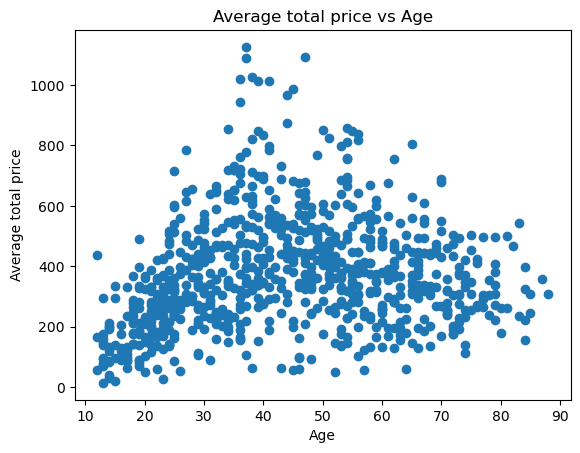

In [35]:
# YOUR CODE HERE
#raise NotImplementedError()
plt.scatter(purchases_c_mean["age"], purchases_c_mean["total_price"])
plt.xlabel("Age")
plt.ylabel("Average total price")
plt.title("Average total price vs Age");

### Problem 13 (quiz)
Find Pearson's correlation coefficient between age and total price.

In [36]:
# YOUR CODE HERE
#raise NotImplementedError()
round(purchases_c_mean["age"].corr(purchases_c_mean["total_price"], method='pearson'), 2)

0.17

### Problem 14 (quiz)
We found correlation in the data present on the previous step and made some conclusions based on this data. However, we have to make sure that we can generalize our conclusion to the corresponding population. To do it, let us perform a statistical test of the significance of correlation. This can be done with `scipy.stats.pearsonr`. However, our data contains `NaN`'s in column `age` (there are registered customers with unknown age). Use method `.dropna()` to remove such rows from the dataset, then perform statistical testing with `pearsonr`. This function returns a two-tuple: first value is correlation coefficient and the second is p-value that corresponds to a test where the null hypothesis is that the correlation in population is zero.

In [37]:
# YOUR CODE HERE
#raise NotImplementedError()
# H_0: r = 0
# H_1: r != 0
alpha = 0.05
r, p_val = pearsonr(purchases_c_mean.dropna()["age"], purchases_c_mean.dropna()["total_price"])
print("r =", r)
print("p-value =", p_val)
print("Reject H_0") if p_val < alpha else print("Do not reject H_0")

r = 0.16539508120771906
p-value = 1.8110789103306339e-06
Reject H_0


### Problem 15 (autograded)
Now we are going to do the main investigation. We want to understand how special offers in our shops affect customers' behaviour. To do it, we have to identify those purchases that are made during special offers. This can be a bit tricky: for each purchase we know its date and shop id. For each shop we also know the dates of all special offers (there can be several). So for each purchase we have to compare its date with dates of all offers that took place in the corresponding shop.

As a first step, let us try to join `purchases_c` with `shops`. Name this table `full_df_preliminary`.

In [38]:
# YOUR CODE HERE
#raise NotImplementedError()
full_df_preliminary = pd.merge(purchases_c, shops, left_on="shop_id", right_on="shop_id", how="inner")
full_df_preliminary

,customer id,age,customer_id,date,shop_id,total_price,month,offer_begin,offer_end
0,1149,71.0,1149.0,2019-05-15,60,40.143994,5,2018-07-07,2018-08-02
1,1149,71.0,1149.0,2018-06-14,60,307.206163,6,2018-07-07,2018-08-02
2,1149,71.0,1149.0,2018-09-20,60,140.601729,9,2018-07-07,2018-08-02
3,1149,71.0,1149.0,2018-07-08,60,374.177967,7,2018-07-07,2018-08-02
4,1149,71.0,1149.0,2018-06-07,60,182.141624,6,2018-07-07,2018-08-02
...,...,...,...,...,...,...,...,...,...
69403,784,NaN,784.0,2018-12-11,31,305.124843,12,2018-12-20,2018-12-28
69404,784,NaN,784.0,2018-12-11,31,305.124843,12,2019-02-22,2019-03-14
69405,784,NaN,784.0,2018-12-11,31,305.124843,12,2018-09-22,2018-10-11
69406,784,NaN,784.0,2018-12-11,31,305.124843,12,2018-06-07,2018-07-10


In [39]:
assert (
    full_df_preliminary.query('date == "2019-04-24" and customer_id == 555.0')[
        "offer_begin"
    ].iloc[0]
    == "2018-08-15"
)
assert (
    full_df_preliminary.query('date == "2018-08-24" and customer_id == 686.0').max()[
        "offer_end"
    ]
    == "2019-01-21"
)

### Problem 16 (autograded)
Let us investigate the table `full_df_preliminary`. Each row of this table corresponds to some purchase. However, for some shops we have several special offers and therefore several rows in the table `shops`. During the join each purchase is joined to all rows of `shops` that correspond to a particular shop. Therefore, purchases are duplicated, and we lost information on which rows in `full_df_preliminary` correspond to which purchase. (For example, the last two rows seem to correspond to the same purchase, but can we be sure?) This is due to the fact that table `purchases_c` don't have any explicit column with purchase identifier. Let us add it. As each row of `purchases_c` corresponds to exactly one purchase, table index can work as such an identifier. To create a column that coincides with the index one can use method `.reset_index()`.

Apply `.reset_index()` to `purchases_c`, then repeat the join from the previous problem. Name the resulting dataframe `full_df`.

In [40]:
# YOUR CODE HERE
#raise NotImplementedError()
purchases_c.reset_index(inplace=True)
full_df = pd.merge(purchases_c, shops, left_on="shop_id", right_on="shop_id", how="inner")
full_df

,index,customer id,age,customer_id,date,shop_id,total_price,month,offer_begin,offer_end
0,0,1149,71.0,1149.0,2019-05-15,60,40.143994,5,2018-07-07,2018-08-02
1,1,1149,71.0,1149.0,2018-06-14,60,307.206163,6,2018-07-07,2018-08-02
2,4,1149,71.0,1149.0,2018-09-20,60,140.601729,9,2018-07-07,2018-08-02
3,6,1149,71.0,1149.0,2018-07-08,60,374.177967,7,2018-07-07,2018-08-02
4,7,1149,71.0,1149.0,2018-06-07,60,182.141624,6,2018-07-07,2018-08-02
...,...,...,...,...,...,...,...,...,...,...
69403,28675,784,NaN,784.0,2018-12-11,31,305.124843,12,2018-12-20,2018-12-28
69404,28675,784,NaN,784.0,2018-12-11,31,305.124843,12,2019-02-22,2019-03-14
69405,28675,784,NaN,784.0,2018-12-11,31,305.124843,12,2018-09-22,2018-10-11
69406,28675,784,NaN,784.0,2018-12-11,31,305.124843,12,2018-06-07,2018-07-10


In [41]:
assert (
    full_df.query("index == 1207")
    .iloc[0][["customer_id", "date", "shop_id", "total_price"]]
    .equals(purchases_c.loc[1207][["customer_id", "date", "shop_id", "total_price"]])
)

### Problem 17 (autograded)
Now we need to check for each purchase, did it happen during any of the special offers or not. In the dataset `full_df`, each row relates some purchase with some special offer that happened in the same shop as a purchase. Let us check, is it true that this purchase happened during the corresponding offer? Add a column `offer` that contains values `True` or `False` that answer this question. To do so, we have to compare the value in column `date` with values in columns `offer_begin` and `offer_end`. Let us assume that `offer_end` is the last day of the offer (so the offer still holds during this day). Name the corresponding dataframe `full_df_offer`. Note that you can compare between dates, but not between dates and strings. Convert your data appropriately.


In [42]:
# YOUR CODE HERE
#raise NotImplementedError()
full_df["offer_begin"] = pd.to_datetime(full_df["offer_begin"])
full_df["offer_end"] = pd.to_datetime(full_df["offer_end"])
full_df["offer"] = (full_df["date"] >= full_df["offer_begin"]) & (full_df["date"] <= full_df["offer_end"])
full_df_offer = full_df
full_df_offer

,index,customer id,age,customer_id,date,shop_id,total_price,month,offer_begin,offer_end,offer
0,0,1149,71.0,1149.0,2019-05-15,60,40.143994,5,2018-07-07,2018-08-02,False
1,1,1149,71.0,1149.0,2018-06-14,60,307.206163,6,2018-07-07,2018-08-02,False
2,4,1149,71.0,1149.0,2018-09-20,60,140.601729,9,2018-07-07,2018-08-02,False
3,6,1149,71.0,1149.0,2018-07-08,60,374.177967,7,2018-07-07,2018-08-02,True
4,7,1149,71.0,1149.0,2018-06-07,60,182.141624,6,2018-07-07,2018-08-02,False
...,...,...,...,...,...,...,...,...,...,...,...
69403,28675,784,NaN,784.0,2018-12-11,31,305.124843,12,2018-12-20,2018-12-28,False
69404,28675,784,NaN,784.0,2018-12-11,31,305.124843,12,2019-02-22,2019-03-14,False
69405,28675,784,NaN,784.0,2018-12-11,31,305.124843,12,2018-09-22,2018-10-11,False
69406,28675,784,NaN,784.0,2018-12-11,31,305.124843,12,2018-06-07,2018-07-10,False


In [43]:
from itertools import islice

for _, row in islice(full_df_offer.iterrows(), 0, 1000):
    assert (
        (pd.to_datetime(row["date"]) >= pd.to_datetime(row["offer_begin"]))
        & (pd.to_datetime(row["date"]) <= pd.to_datetime(row["offer_end"]))
    ) == row["offer"]

### Almost here
Now we have a table that contains information on whether a particular purchase happened during a particular special offer. What we need is a new table that contains information on whether a particular purchase happened during *any* relevant special offer. This can be done by grouping and aggregating. Basically, we need to group our table by column `index` that contains a purchase identifier and apply a special aggregation function `any` to column `offer`. This function checks if there is any `True` element in a group and returns `True` in this case, otherwise (everything is `False`) it returns false. Also, we have to keep all other columns that are related to purchases as is. They are duplicated in the group, so we can just get the first value. This is done by the aggregation function `first`. To apply these functions to different columns, we have to pass a dictionary to method `.agg`. Let's see what's happening.


In [44]:
purchases_offer = full_df_offer.groupby("index").agg(
    {
        "customer_id": "first",
        "date": "first",
        "shop_id": "first",
        "total_price": "first",
        "month": "first",
        "age": "first",
        "offer": "any",
    }
)
purchases_offer

,customer_id,date,shop_id,total_price,month,age,offer
index,,,,,,,
0,1149.0,2019-05-15,60,40.143994,5,71.0,False
1,1149.0,2018-06-14,60,307.206163,6,71.0,False
2,1149.0,2018-09-23,4,1327.170365,9,71.0,True
3,1149.0,2018-07-04,22,151.766925,7,71.0,False
4,1149.0,2018-09-20,60,140.601729,9,71.0,False
...,...,...,...,...,...,...,...
28794,562.0,2019-05-11,74,592.305574,5,22.0,False
28795,562.0,2018-12-08,74,232.074279,12,22.0,True
28796,562.0,2018-12-16,74,1075.034721,12,22.0,True


### Problem 18 (quiz)
Do people tend to spend more money when they make a purchase during a special offer? Let's check it!

First of all, we know that during December people spend more money in shops due to holidays and at the time shops usually announce more special offers during December. As we are interested in the effect of special offers alone, let us remove all purchases that happened during December.

Then create a table which rows are customers that contains two columns: in one column we have average of all prices of purchases that were made during special offers, and in the second the same for purchases that were not made during special offers. Drop all rows that contain `NaN`'s. Then apply an appropriate statistical test to check if there is any statistically significant difference between these columns. Use two-sided alternative.




In [45]:
# YOUR CODE HERE
#raise NotImplementedError()
purchases_offer = purchases_offer.loc[purchases_offer["month"] != 12]
purchases_offer = purchases_offer.pivot_table(index="customer_id", columns="offer", values="total_price", aggfunc=np.mean).dropna()
purchases_offer

offer,False,True
customer_id,,
0.0,685.331168,901.935686
2.0,389.216152,318.049544
3.0,311.611398,551.356873
4.0,347.161530,325.092632
5.0,487.628759,279.079141
...,...,...
1206.0,240.058252,245.374937
1207.0,413.785779,941.025534
1208.0,542.108836,683.695119


In [46]:
# Since we compare pairs of value for each customer, we need to use paired two-sided t-test
# H_0: mu_True = mu_False
# H_1: mu_True != mu_False
alpha = 0.05
t_stat, p_val = ttest_rel(purchases_offer[True], purchases_offer[False])
print("t_stat =", round(t_stat))
print("p-value =", p_val)
print("Reject H_0") if p_val < alpha else print("Do not reject H_0")

t_stat = 17
p-value = 3.221672499502215e-53
Reject H_0


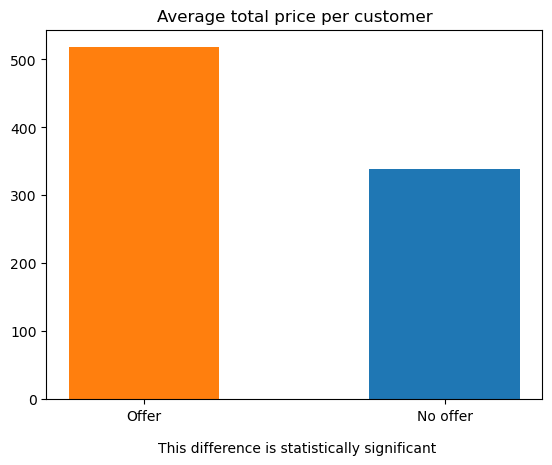

In [47]:
plt.bar(["Offer"], height=[purchases_offer[True].mean()], width=0.5, color="C1")
plt.bar(["No offer"], height=[purchases_offer[False].mean()], width=0.5, color="C0")
plt.title("Average total price per customer")
plt.figtext(0.3, 0, "This difference is statistically significant", fontsize=10);